Naive Bayes

Bayes thm:- 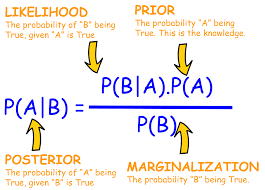

Example :-

Given we have machine 1 producing 30 spanner/hr
also there is machine 2 producing 20 spanner/hr

Also out of all the spanners we know that 1% of the spanners are defective

And out of all those defective parts 50% of them are from machine 1 and 50% of them are from machine 2

    Question:- What is the probability that the part produced by machine 2 is defective

    P(machine 1) = 30/50 = 0.6
    P(machine 2) = 20/50 = 0.4

    P(defect) = 0.01

    P(Machine 1 | defective) = 0.5
    P(Machine 2 | defective) = 0.5

    P(defective | machine 2) = P(Machine 2 | defective) * P(defective) / P(Machine 2)

    P(defective | machine 2) = 0.5 * 0.01 / 0.4

        P(defective | machine 2) = 0.0125 -> 1.25%

How would we use Bayes' thm to create a datascience model

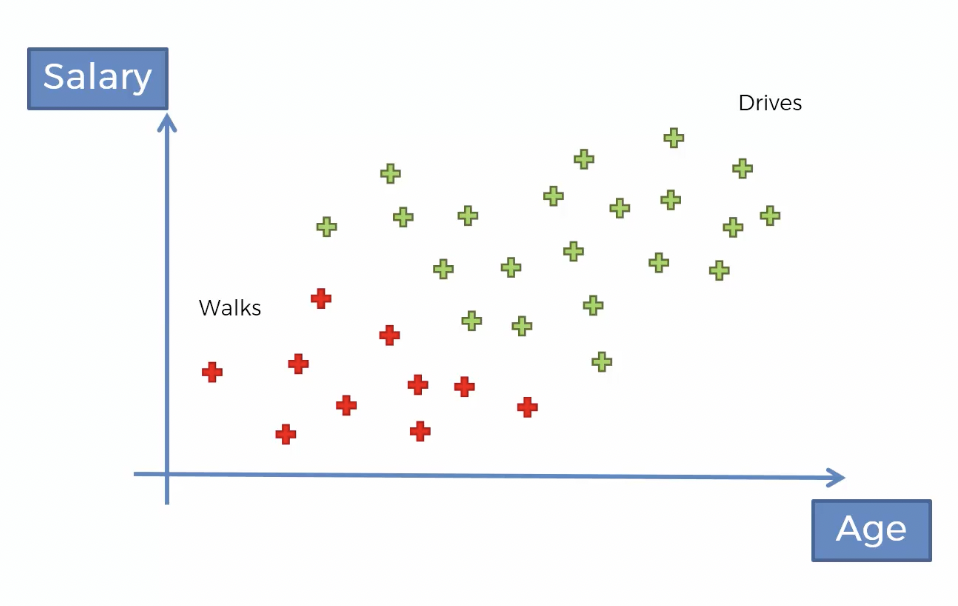

For example we have these data points and we add a new datapoint and we want to classify it
Should we make it green i.e. walks or red i.e. drives

This is a supervised data model

Plan of attack :-

Step 1:- We would be applying the Bayes' thm twice 

First:- 
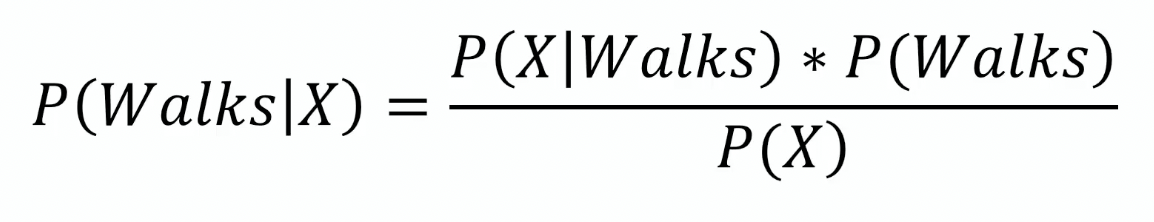

Second:- 
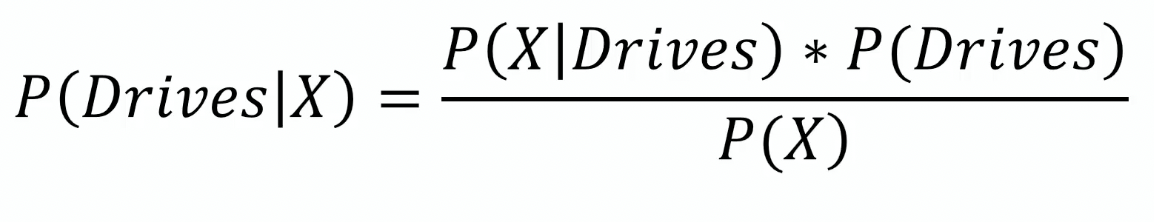

Then Do P(Walks | X) v/s P(Drives | X)

1. Find P(walks) = total number of observations of walking / total observations
2. To find P(X)
    we would select the new data point and then we would be drawing a circle around it the radius is defined by us
    then we would be calculating the diffrent data points in that radius 
    then we would look all the points and then deem all of them to be similar
    We would be calculating the probability of X

    P(X) = Number of similar points / Total number of observations

3. Find P(X | Walks) = P(X intersection Walks) / P(Walks)
4. Find final probability

Do the same for P(Drives | X)

Import the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

Devide the data into test and training set

In [3]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Naive Bayes' model on Training set

In [7]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

Get the prediction from the model

In [8]:
classifier.predict([[30,87000]])

array([1])

Get the prediction of the test set

In [9]:
Y_pred = classifier.predict(X_test)

# printing the values

print(np.concatenate((Y_test.reshape((len(Y_test),1)) , Y_pred.reshape((len(Y_pred),1))),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


Create a confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[55  3]
 [ 4 18]]


Accuracy of the model

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_pred)

0.9125

Visualize the model Training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


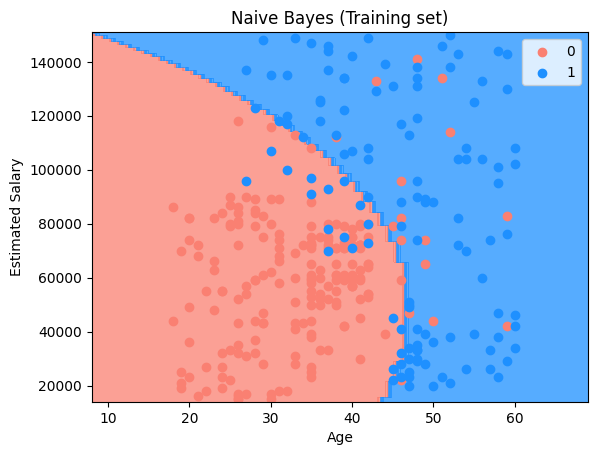

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualize the model on test set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


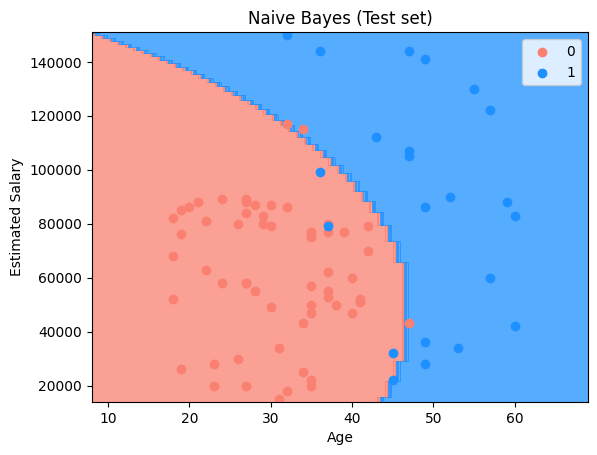

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()